In [77]:
import numpy as np
from qiskit import QuantumCircuit
import math

# input your two numbers here
num1 = 3
num2 = 14

# input bit size of numbers. Put the samller bit size second
bit1 = 2
bit2 = 4

In [78]:
num_size = max(bit1,bit2)
small_num = min(bit1,bit2)
    
num1 = "{0:b}".format(num1)[::-1]
num2 = "{0:b}".format(num2)[::-1]

circuit_size = num_size + small_num + (num_size + 1)

qc = QuantumCircuit(circuit_size)

# This part sets up the inputs and puts the X  gates
for i in range(num_size):
    if bit1 > bit2:
        if (len(num1) > i and num1[i] == '1'):
            qc.x(i)
        if (len(num2) > i and num2[i] == '1'):
            qc.x(i + num_size)
    else:
        if (len(num2) > i and num2[i] == '1'):
            qc.x(i)
        if (len(num1) > i and num1[i] == '1'):
            qc.x(i + num_size)
    

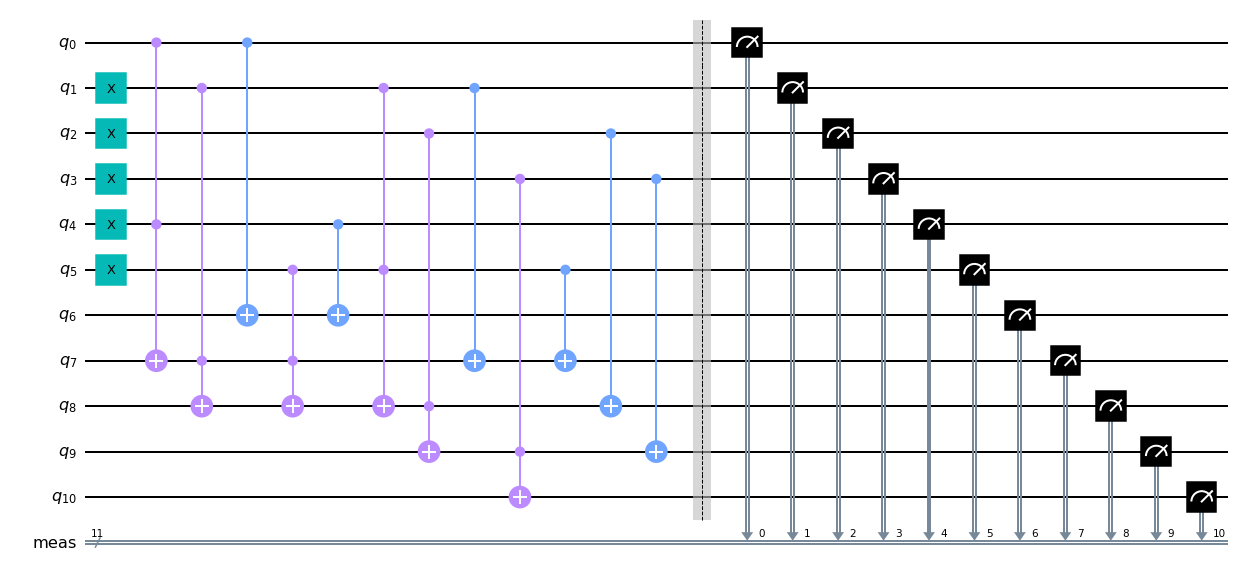

In [79]:

# This part calculates all of the carry bits 
for i in range(num_size):
    
    if i < small_num:
        qc.ccx(i, i + num_size, i + (num_size + small_num) + 1)
    
    if i + 1 < num_size:
        qc.ccx(i + 1, i + (num_size + small_num) + 1,i + (num_size + small_num) + 2)
        if i + 1 < small_num:
            qc.ccx(i + num_size + 1, i + (num_size + small_num) + 1,i + (num_size + small_num) + 2)
    
    

for i in range(num_size):
    qc.cx(i, i + (num_size + small_num))
    if i < small_num:
        qc.cx(i + num_size, i + (num_size + small_num))

#qc.cx(1,2)
#qc.cx(0,2)

#qc.ccx(0,1,3)
qc.measure_all()
qc.draw('mpl')

In [80]:
# Adding the transpiler to reduce the circuit to QASM instructions
# supported by the backend
from qiskit import transpile

# Use AerSimulator
from qiskit.providers.aer import AerSimulator

backend = AerSimulator()

# First we have to transpile the quantum circuit
# to the low-level QASM instructions used by the
# backend
qc_compiled = transpile(qc, backend)

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend.run(qc_compiled, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

In [81]:
counts = result_sim.get_counts(qc_compiled)
print(counts)

{'10001111110': 1024}


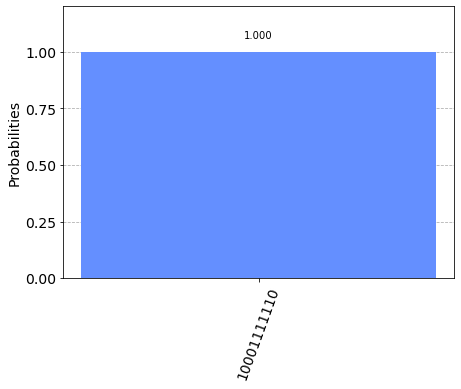

In [82]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)